In [501]:
# data analysing
import numpy as np
import pandas as pd
import re
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [502]:
df=pd.read_csv(r'C:\Users\deepa\Desktop\Titanic Survival\titanic.csv',encoding='unicode_escape')

In [503]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [504]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [505]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [506]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [507]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


observations:-
There is total 1309 passengers
Most people belongs to Pclass=3
Max fair of ticket is 512

In [508]:
df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [509]:
df.isnull().sum()/len(df)*100
# finding the percentage of null values in database

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

C:\Users\deepa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


male      266
female    152
Name: Sex, dtype: int64

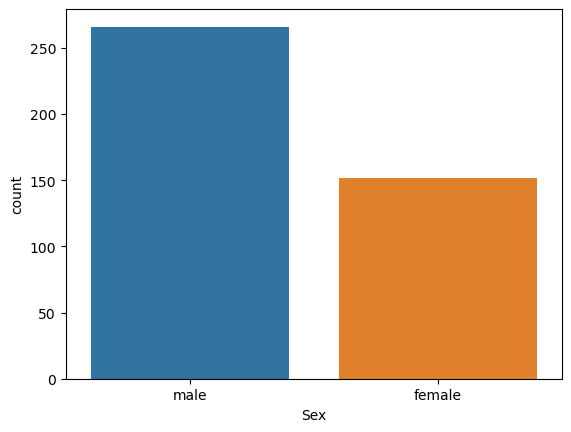

In [510]:
sns.countplot('Sex',data=df)
df['Sex'].value_counts()

The total number of male passengers is greater than the total number of female passengers. 
This is evident from the taller overall bars representing males in the graph.

,Sex,Survived
0,female,1.0
1,male,0.0


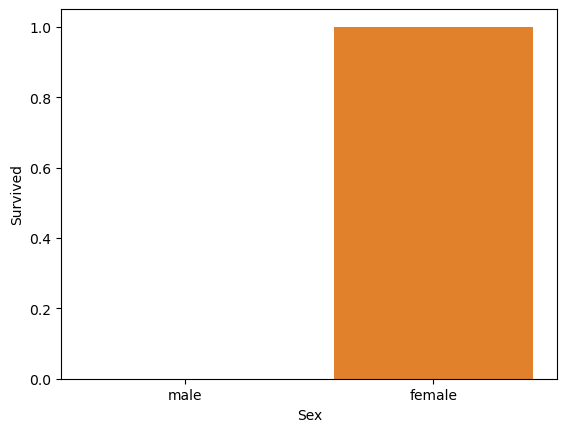

In [511]:
sns.barplot(x='Sex',y='Survived',data=df)
df.groupby('Sex',as_index=False).Survived.mean()

Despite the larger number of male passengers, the survival rate among males is significantly lower than that of females. A greater proportion of female passengers survived compared to male passengers.

,Pclass,Survived
0,1,0.467290
2,3,0.330275
1,2,0.322581


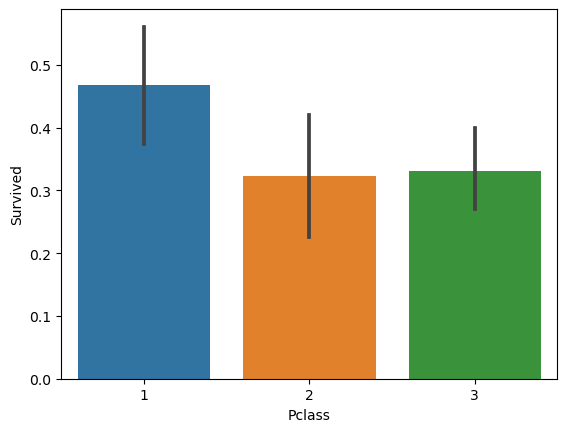

In [512]:
# comparing Pclass survivals
sns.barplot(x='Pclass',y='Survived',data=df)
df[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
1,Q,0.521739
0,C,0.392157
2,S,0.325926


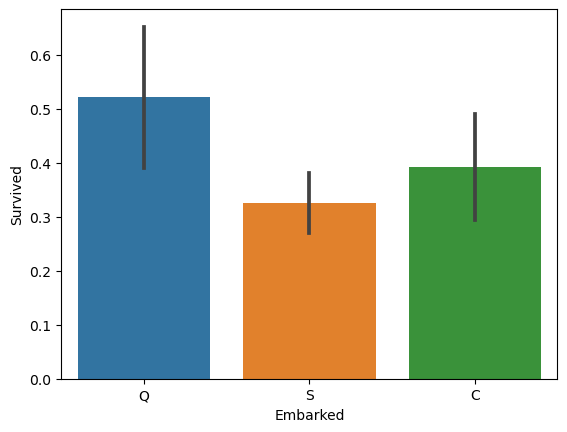

In [513]:
# comparing the embark feature against survived
sns.barplot(x='Embarked',y='Survived',data=df)
df[["Embarked", "Survived"]].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
4,4,1.000000
3,3,0.666667
2,2,0.606061
1,1,0.538462
7,9,0.500000
0,0,0.305556
5,5,0.000000
6,6,0.000000


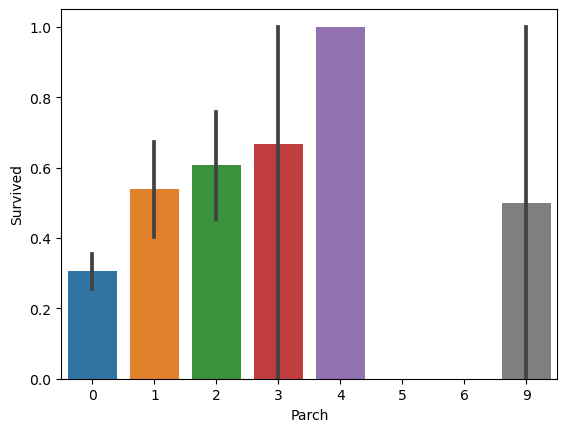

In [514]:
# comparing the parch feature against survived
sns.barplot(x='Parch',y='Survived',data=df)
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

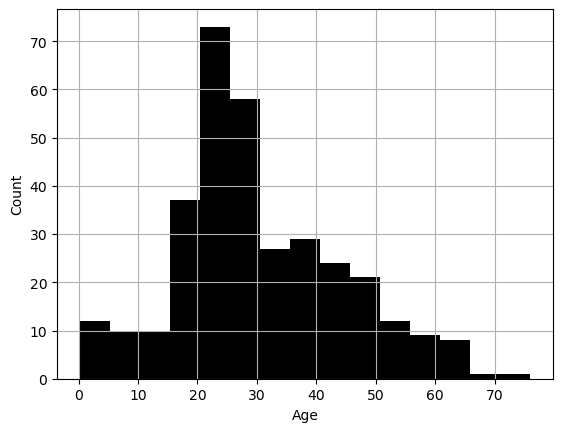

The Median age of passengers is: 27
The Standard Deviation age of Passengers is: 14


In [515]:
#histogram of age values
df.Age.hist(bins=15,color='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()
print("The Median age of passengers is:",int(df.Age.median()))
print("The Standard Deviation age of Passengers is:",int(df.Age.std()))

The maximum number of passengers fall within the age range of 20-30. This age group has the tallest bars in the graph, indicating that the majority of the passengers were young adults.

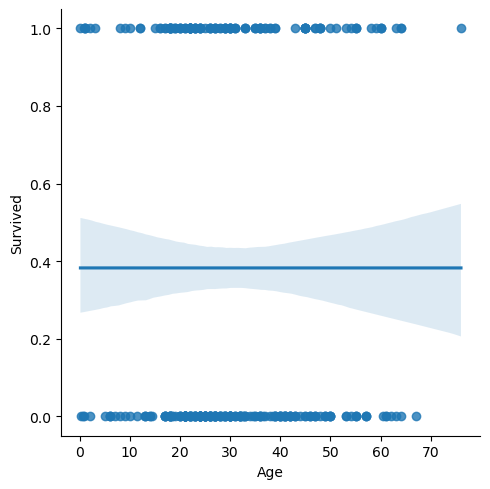

In [516]:
sns.lmplot(x='Age',y='Survived',data=df)

visualizing the relationship between age and survival probability in the Titanic dataset.

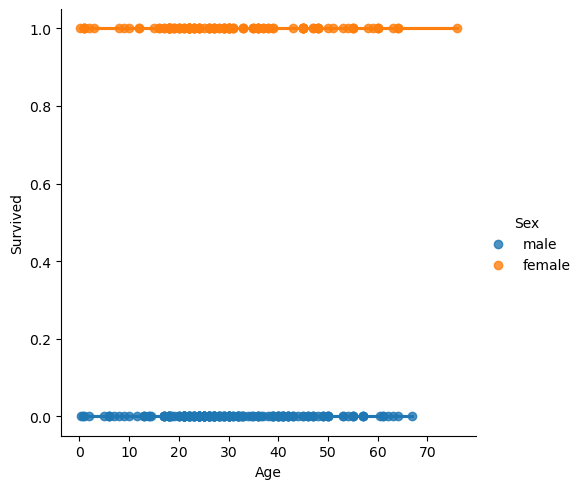

In [517]:
sns.lmplot(x='Age',y='Survived',data=df,hue='Sex')

,Sex,Age
0,female,27.0
1,male,27.0


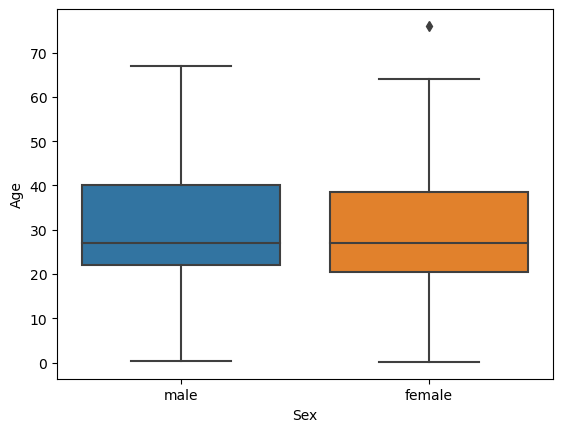

In [518]:
# <!-- outliners for Age data  -->
sns.boxplot(x='Sex',y='Age',data=df)

# <!-- Median age according to sex -->
df.groupby('Sex',as_index=False)['Age'].median()

boxplot to visualize the distribution of ages for male and female passengers on the Titanic.

Mean value of Fare is: 35.6271884892086
Median value of Fare is: 14.4542


C:\Users\deepa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


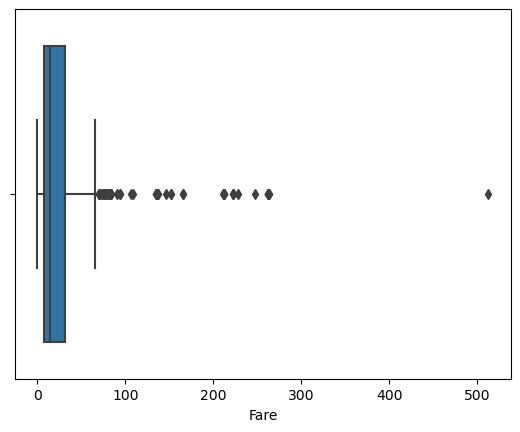

In [519]:
# Fre column 
sns.boxplot("Fare",data=df)
# Mean and Median fare values
print("Mean value of Fare is:",df.Fare.mean())
print("Median value of Fare is:",df.Fare.median())

boxplot to visualize the distribution of fare prices paid by the passengers on the Titanic.

In [520]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [521]:

df.drop(['Cabin','Ticket'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


Data Cleaning

In [522]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [523]:
# filling the missing values
df.Embarked.fillna('S',inplace=True)
df.Age.fillna(28,inplace=True)
df.Name.fillna('N',inplace=True)
df.Fare.fillna(df.Fare.median(),inplace=True)

commands perform data cleaning by filling in missing values in specific columns of the Titanic dataset.

In [524]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S


In [525]:
combined_data=[df]
for d in combined_data:
      d['Title'] = d.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(df['Title'],df['Sex'])

Sex,female,male
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


extracting titles from the 'Name' column and creating a cross-tabulation of the titles by sex.

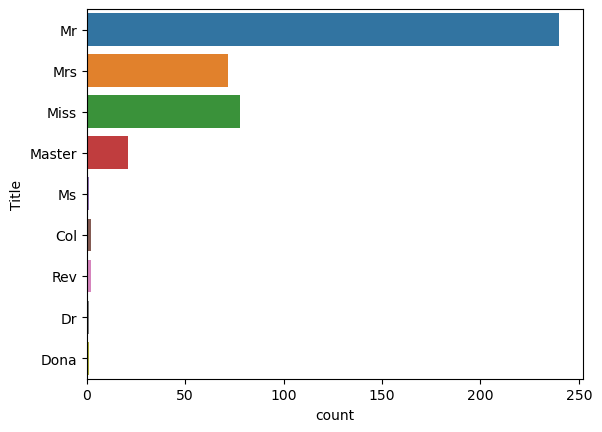

In [526]:
# extracting various title in Name column
combined_data=[df]
for d in combined_data:
    d['Title']=d.Name.str.extract('([A-Za-z]+)\.',expand=False)
    sns.countplot(y='Title',data=df)
   

Title "Mr" has the longest bar corresponds to "Mr", indicating that the majority of passengers are male adults.
Titles "Mrs" and "Miss", these titles are likely to have the next longest bars, representing married and unmarried women, respectively.
Other Titles such as "Master", "Dr", "Rev", "Col", etc., will appear less frequently and have shorter bars.

In [527]:
combined_data=[df]

In [528]:
for d in combined_data:
    d['Title']=d['Title'].replace(['Ms','Col','Rev','Dr','Dona'],'Special')
d.groupby('Title',as_index=False)['Survived'].mean().sort_values(by='Survived',ascending=False)
    

,Title,Survived
1,Miss,1.000000
3,Mrs,1.000000
4,Special,0.285714
0,Master,0.000000
2,Mr,0.000000


This code consolidates less common or unique titles into a single category called 'Special'.
The replace method is used to substitute the specified titles with 'Special'.
This simplifies the title categories and helps in focusing on more common titles while grouping less frequent titles together.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Mr
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Mrs
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Mr
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Mr
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Mrs


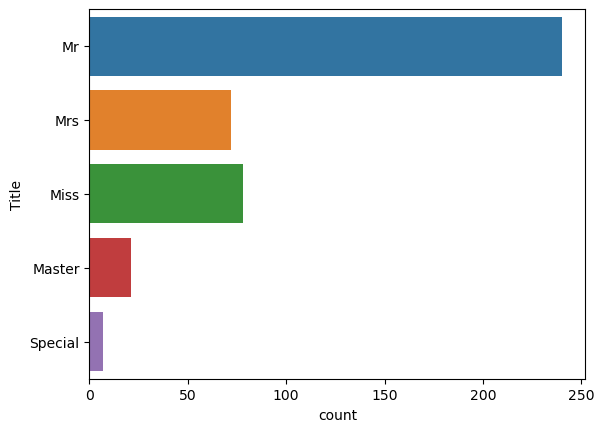

In [529]:
sns.countplot(y='Title',data=df)
df.head()

In [530]:
# Mapping the title names to numeric values
t_mapping={"Mr":1 ,"Mrs":2 , "Miss":3 ,"Master":4 ,"Special":5}
for d in combined_data:
    d['Title']=d.Title.map(t_mapping)
    d['Title']=d.Title.fillna(0)


In [531]:
# clustering the passengers travelling alone
for d in combined_data:
    d["Family"]=d['SibSp']+d['Parch']
    d["IsAlone"]=np.where(d["Family"]>0,0,1)
    d.drop('Family',axis=1,inplace=True)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsAlone
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,2,0


In [532]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsAlone
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,2,0


In [533]:
#survived passengers according to their family size
for d in combined_data:
    d['FamilySize']=d['SibSp']+d['Parch']+1
df[['FamilySize','Survived']].groupby(['FamilySize'],as_index=False).mean().sort_values(by='Survived',ascending=False)

,FamilySize,Survived
3,4,0.714286
5,6,0.666667
2,3,0.526316
7,8,0.500000
8,11,0.500000
1,2,0.486486
4,5,0.285714
0,1,0.268775
6,7,0.250000


**Higher Survival Rates:** Passengers with a family size of 4 have the highest survival rate at 71%, followed closely by those with a family size of 6 at 67%.
**Small Families:** Families with 2 or 3 members also show relatively high survival rates compared to larger families.
**Large Families:** Families with 5 or more members tend to have lower survival rates, possibly due to difficulties in coordination and evacuation.

In [534]:
# minor passengers
for d in combined_data:
    d["Minor"]=np.where(d['Age'] < 15,1,0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsAlone,FamilySize,Minor
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,1,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,0,2,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,1,1,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,1,1,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,2,0,3,0


In [535]:
df["Old_Female"]=(df['Age']>50)&(df['Sex']=='female')
df['Old_Female']=df['Old_Female'].astype(int)


creating a new binary column in the dataframe df named "Old_Female" based on specified conditions involving age and sex.

In [536]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsAlone,FamilySize,Minor,Old_Female
413,1305,0,3,"Spector, Mr. Woolf",male,28.0,0,0,8.0500,S,1,1,1,0,0
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C,5,1,1,0,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S,1,1,1,0,0
416,1308,0,3,"Ware, Mr. Frederick",male,28.0,0,0,8.0500,S,1,1,1,0,0
417,1309,0,3,"Peter, Master. Michael J",male,28.0,1,1,22.3583,C,4,0,3,0,0


In [537]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,IsAlone,FamilySize,Minor,Old_Female
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,1,1,0,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,2,0,2,0,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,1,1,0,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,1,1,0,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,2,0,3,0,0


In [538]:
# converting categorical variables into numerical ones
df=pd.get_dummies(df,columns=['Pclass','Sex','Embarked'],drop_first=True)
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Fare,Title,IsAlone,FamilySize,Minor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,892,0,"Kelly, Mr. James",34.5,0,0,7.8292,1,1,1,0,0,0,1,1,1,0
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,7.0000,2,0,2,0,0,0,1,0,0,1
2,894,0,"Myles, Mr. Thomas Francis",62.0,0,0,9.6875,1,1,1,0,0,1,0,1,1,0
3,895,0,"Wirz, Mr. Albert",27.0,0,0,8.6625,1,1,1,0,0,0,1,1,0,1
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,12.2875,2,0,3,0,0,0,1,0,0,1


The original categorical columns ('Pclass', 'Sex', 'Embarked') are replaced with multiple columns containing binary indicators (0 or 1).
Each unique category in the original columns is represented by a new binary column.
This is done to ease the ML algorithms or statistical analysis

In [539]:
# creating age bands and fare bands
df['AgeBand']=pd.qcut(df.Age,4,labels=False)
df['FareBand']=pd.qcut(df.Fare,7,labels=False)

transforming continuous variables into categorical or ordinal variables based on quantiles, facilitating data interpretation, model compatibility, and enhancing the robustness of statistical analyses and machine learning models.

In [540]:
# dropping age and fare columns
df.drop(['Fare','Age'],axis=1,inplace=True)

In [541]:
df.head()

,PassengerId,Survived,Name,SibSp,Parch,Title,IsAlone,FamilySize,Minor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeBand,FareBand
0,892,0,"Kelly, Mr. James",0,0,1,1,1,0,0,0,1,1,1,0,2,1
1,893,1,"Wilkes, Mrs. James (Ellen Needs)",1,0,2,0,2,0,0,0,1,0,0,1,3,0
2,894,0,"Myles, Mr. Thomas Francis",0,0,1,1,1,0,0,1,0,1,1,0,3,2
3,895,0,"Wirz, Mr. Albert",0,0,1,1,1,0,0,0,1,1,0,1,1,2
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,2,0,3,0,0,0,1,0,0,1,0,2


**we can get best result by applying ML**

In [542]:
# Required ML Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

In [543]:
le = preprocessing.LabelEncoder()
df['Name'] = le.fit_transform(df.Name.values)
df['Name'] = le.fit_transform(df['Name'])
predictors = df.drop(['Survived', 'PassengerId'], axis=1) 
target = df["Survived"] 
x_train, x_val, y_train, y_val = train_test_split( 
    predictors, target, test_size=0.2, random_state=0) 

we use, LabelEncoder from sklearn.preprocessing and LabelEncoder is used to transform categorical labels into numeric labels.
For train_test split: we define, **predictors**- Contains all columns except 'Survived' and 'PassengerId'.
**target** -Contains the 'Survived' column which is what we want to predict.


It prepares the Titanic dataset for machine learning by encoding categorical data and splitting it into training and validation sets. It will allow us to train models on the training data and evaluate their performance on unseen validation data.

In [544]:

df.head()

,PassengerId,Survived,Name,SibSp,Parch,Title,IsAlone,FamilySize,Minor,Old_Female,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,AgeBand,FareBand
0,892,0,206,0,0,1,1,1,0,0,0,1,1,1,0,2,1
1,893,1,403,1,0,2,0,2,0,0,0,1,0,0,1,3,0
2,894,0,269,0,0,1,1,1,0,0,1,0,1,1,0,3,2
3,895,0,408,0,0,1,1,1,0,0,0,1,1,0,1,1,2
4,896,1,178,1,1,2,0,3,0,0,0,1,0,0,1,0,2


In [545]:
x_val.keys()

Index(['Name', 'SibSp', 'Parch', 'Title', 'IsAlone', 'FamilySize', 'Minor',
       'Old_Female', 'Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q',
       'Embarked_S', 'AgeBand', 'FareBand'],
      dtype='object')

In [546]:
x_train.dtypes

Name          int64
SibSp         int64
Parch         int64
Title         int64
IsAlone       int32
FamilySize    int64
Minor         int32
Old_Female    int32
Pclass_2      uint8
Pclass_3      uint8
Sex_male      uint8
Embarked_Q    uint8
Embarked_S    uint8
AgeBand       int64
FareBand      int64
dtype: object

Here all the columns is of integer datatype

In [547]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_val)
acc_logreg=(accuracy_score(y_pred,y_val)*100)
acc_logreg


C:\Users\deepa\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


100.0

Here, we are getting accuracy of 100%, which is typically unusal for real life dataset, however for the small sample of dataset. Logistic Regression for this dataset suggests that the model is able to perfectly predict the outcome ('Survived' vs. 'Not Survived') for every instance in your validation set (x_val, y_val). 

In [548]:
random_forest = RandomForestClassifier()
ne = np.arange(1,20)
param_grid = {'n_estimators' : ne}

rf_cv = GridSearchCV(random_forest, param_grid=param_grid, cv=5)

rf_cv.fit(predictors, target)
print('Best value of n_estimators:',rf_cv.best_params_)
print('Best score:',rf_cv.best_score_*100)

Best value of n_estimators: {'n_estimators': 7}
Best score: 100.0


We have confirmed the accuracy by applying Random Forest Classifier